In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Part A

In [0]:
from keras.preprocessing import image
from keras.applications.xception import Xception, preprocess_input as ppix, decode_predictions
import numpy as np

model = Xception(weights="imagenet")

In [28]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

#### Download Image

In [3]:
!wget https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg

--2019-08-05 02:18:05--  https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg
Resolving media.karousell.com (media.karousell.com)... 141.101.114.84, 190.93.244.83, 190.93.246.83, ...
Connecting to media.karousell.com (media.karousell.com)|141.101.114.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58670 (57K) [image/jpeg]
Saving to: ‘16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg’

16_scale_tony_stark 100%[===================>]  57.29K  --.-KB/s    in 0.007s  

2019-08-05 02:18:05 (7.69 MB/s) - ‘16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg’ saved [58670/58670]




### Gradcam Function

In [0]:

def gradcam_heat_map(images,model,last_convo_layer_name,normalized=True):
  #class names present in data set 
  
  # convert one hot vector to single values
  #labels = [np.where(label==1)[0][0] for label in labels]
  layer_out_channels = model.get_layer(last_convo_layer_name).output_shape[-1]
  for j in range(0,len(images)):
    
    input_image = images[j]
    
    if not normalized:
      input_image = input_image/255
    #image_expanded = np.expand_dims(input_image, axis=0)
    image_expanded = np.expand_dims(input_image, axis=0)
    #image_expanded = preprocess_input(image_expanded)
    preds = model.predict(image_expanded)
    class_idx = 837
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(last_convo_layer_name)
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([image_expanded])
    for i in range(layer_out_channels):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    img = cv2.resize(input_image,(299,299))
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    heatmap = heatmap/255

    # superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0)
    superimposed_img = 0.75*(img) + 0.25*heatmap
    superimposed_img = superimposed_img

    img_list = [img,heatmap,superimposed_img]
    fig = plt.figure(figsize=(10,3))
    titles = ['Original','Heatmap','Superimposed']
    for i in range(0,3):
      ax = fig.add_subplot(1, 3, 1 + i, xticks=[], yticks=[])
      plt.imshow(img_list[i])
      if j == 0:  
        plt.title(titles[i])
      if i == 0:
       plt.ylabel('class: '+'Sunglass')
    plt.show()
    

In [0]:
from skimage import io
import cv2
#img = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
img = io.imread("/content/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg")
img = cv2.resize(img, dsize=(299, 299), interpolation=cv2.INTER_CUBIC)


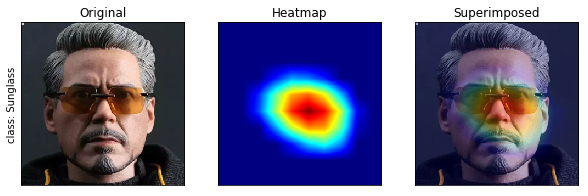

In [45]:
gradcam_heat_map(np.array([img]),model,'block14_sepconv2',normalized=False)

### Part B

As we see in the paper the convolution carried out is of type 3D. There is not much diffrence between 3D convolution and 2D convolution. 
Just the convolving space differs. The receptive field calculation used for 2D space is holds good for 3D convolution also.


In [46]:
from google.colab import files
files.upload()

Saving RF_3D.png to RF_3D.png


{'RF_3D.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\t\x00\x00\x01\x01\x08\x06\x00\x00\x003W\xe9\xc8\x00\x00\x18diCCPICC Profile\x00\x00X\x85\x95y\x05TT_\x17\xef\xb9\x93\xcc0Cwww\x87\xc4\xd0\xdd\r\x82\xc3PCK\x83 )\n\xa8`!\x02\x8a\x94\x88\x94`\x80\x88\x08\x08(\x8a \x88\x88`\x80\x8a\x8a\xa2b\xa0(\xf5.\xa1\xdf\xff\xfb\x7fk\xbd\xb7\xdeY\xeb\xdc\xfb\x9b}\xf6\xd9q\xce>\xb1\xef\x00\xc0\x9dF\x8e\x8c\x0cE0\x00\x10\x16\x1e\x13\xe5`j \xe0\xe6\xee!\x80}\x05\x10\x80\x00X\x80\x14`!S\xa2#IvvV\x00.\x7f\xde\xff]~\x8c\x03h\xe3\xfdPvC\xd6\xff\xb6\xff_\x0b\xa3\x9f\x7f4\x05\x00\xc8\x0e\xc6\xbe~\xd1\x940\x18_\x06\x00\x95E\x89\x8c\x8a\x01\x00\xa3\x01\xd3\x85\xe3c"7\xb0\x17\x8cY\xa2`\x03a\x1c\xb9\x81\x03\xb7p\xd6\x06\xf6\xdd\xc2E\x9b<N\x0e\x860\xae\x07\x80\x86@&G\x05\x02@\xd7\x06\xd3\x05\xe2(\x81\xb0\x1c\xba\t\xb8\x8d)\xdc\x8f\x1a\x0e\xb3\xce\xc3X\x97\x12D\xf6\x03\x80[\x06\xe6\x91\t\x0b\x8b\xd8\xc0n0\x96\xf0\xfd\x87\x9c\xc0\xff\x92\xe9\xfbW&\x99\x1c\xf8\x17o\xf9\xb2Yh\x8c\xa8\xd1\x91\xa1\xe4\xc4\xf

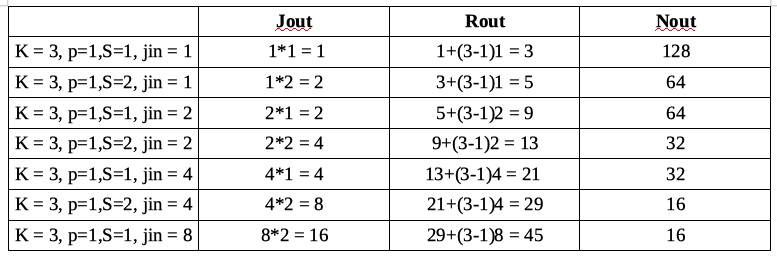

In [51]:
from google.colab.patches import cv2_imshow
rf_img = io.imread("/content/RF_3D.png")
cv2_imshow(cv2.cvtColor(rf_img, cv2.COLOR_BGR2RGB))

As we observe in the above figure, group of 2 rows belongs to one block.  The Nout is decreaing by half whenever stride is 2. So we can see that the same RF calculation holds good for 3D conv also. 